In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./course-data/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
X = df.drop('sales',axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
pol_conv = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
pol_conv.fit(X)

# done in many tools of sklearn: defines the data range we're going to be using, afterwards we can transform the data -> since this is a very common operation, there's also a fit_transform 

# in this case fit analyses what degree we want to go to, and if the bias is included or not; it is also important to later use the get_feature_names method

PolynomialFeatures(include_bias=False)

In [10]:
pol_features = pol_conv.transform(X)

In [11]:
# alternative to the two lines above
pol_conv.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
X.shape

(200, 3)

In [13]:
pol_features.shape

(200, 9)

In [14]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [15]:
pol_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
# see better alternative bellow
for i,coeff in enumerate(pol_features[0]): 
    print(f'x_{i} = {coeff:.2f}')

# note that the values for the first 3 columns are our original feature terms
# the next terms are returned by the transform method: x1**2, x1*x2, x1*x3, x2**2, x2*x3,x3**2

# this way we went from 3 features to 9 features -> we expand the feature set we can train the model on -> create more signal for a linear regression

x_0 = 230.10
x_1 = 37.80
x_2 = 69.20
x_3 = 52946.01
x_4 = 8697.78
x_5 = 15922.92
x_6 = 1428.84
x_7 = 2615.76
x_8 = 4788.64


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# recall that X only has the original 3 features, we want to split on the entire polynomical feature set

# keep the parameters test_size and random_state the same as before so that we can compare performance metrics

# here it's important to pass the transformed X! 

X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test, y_pred)

In [26]:
MSE = mean_squared_error(y_test, y_pred)

In [27]:
RMSE = np.sqrt(MSE)

In [28]:
MAE

0.5475837919149621

In [29]:
RMSE

0.6784587307926914

In [30]:
print('Compare this to metrics of the previous model: MAE = 1.213, RMSE = 1.9307')

# the only way to fairly compare your previous values is if we perform the exact same train-test-split on this model as in the other one

Compare this to metrics of the previous model: MAE = 1.213, RMSE = 1.516


In [31]:
model.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [32]:
# the option below might be better
pol_conv.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [33]:
pol_conv.get_feature_names(X.columns)

['TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV radio',
 'TV newspaper',
 'radio^2',
 'radio newspaper',
 'newspaper^2']

In [34]:
# we the help of this method we can make a data frame

pol_features_df = pd.DataFrame(pol_conv.transform(X), columns=pol_conv.get_feature_names(X.columns))

In [35]:
pol_features_df.head()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [36]:
for i, feature in enumerate(pol_features_df):
    print(f'{feature} = {model.coef_[i]:.4f}')

# note that for all non-linear features and interactions terms are almost 0

TV = 0.0549
radio = 0.0142
newspaper = 0.0117
TV^2 = -0.0001
TV radio = 0.0011
TV newspaper = -0.0001
radio^2 = 0.0003
radio newspaper = 0.0001
newspaper^2 = 0.0001


In [77]:
# create transformation
pol_converter = PolynomialFeatures(degree=3, include_bias=False)
# store transformed features
pol_features = pol_converter.fit_transform(X)
# split the transformed data
X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)
# create model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

model.coef_

feature_names = pol_converter.get_feature_names(X.columns)

for i, feature in enumerate(feature_names):
    print(f'{feature} = {model.coef_[i]:.4f}')

TV = 0.0948
radio = 0.0112
newspaper = 0.0282
TV^2 = -0.0005
TV radio = 0.0014
TV newspaper = -0.0003
radio^2 = 0.0001
radio newspaper = 0.0003
newspaper^2 = 0.0001
TV^3 = 0.0000
TV^2 radio = -0.0000
TV^2 newspaper = 0.0000
TV radio^2 = -0.0000
TV radio newspaper = -0.0000
TV newspaper^2 = 0.0000
radio^3 = -0.0000
radio^2 newspaper = 0.0000
radio newspaper^2 = -0.0000
newspaper^3 = -0.0000


---

In [37]:
# create the different order poly
# split poly set of features in train / test
# fit on train
# store / save the RMSE for both the train and test
# plot the results: poly order versus error

# here we just want the error statistic and don't save the models generated

In [55]:
train_rmse_errs_list = []
test_rmse_errs_list = []

for d in range(1,10): 
    # create transformation poly_converter:X->X'
    pol_converter = PolynomialFeatures(degree=d, include_bias=False)
    # store transformed features
    pol_features = pol_converter.fit_transform(X)
    
    # split the transformed data
    X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)
    
    # create model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    
    # predict on training data
    train_pred = model.predict(X_train)
    # predict on test data
    test_pred = model.predict(X_test)
    
    # generate error statistic
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # append the error statistic to the list
    train_rmse_errs_list.append(train_rmse)
    test_rmse_errs_list.append(test_rmse)
    
train_rmse_errs_ser = pd.Series(train_rmse_errs_list,index=list(range(1,10)))
test_rmse_errs_ser = pd.Series(test_rmse_errs_list,index=list(range(1,10)))

In [56]:
# return the Series with the error statistics on the train set
train_rmse_errs_ser

1    1.552694
2    0.605770
3    0.475685
4    0.374299
5    0.241088
6    0.197651
7    3.573229
8    0.106435
9    0.120819
dtype: float64

In [57]:
# return the Series with the error statistics on the test set
test_rmse_errs_ser

# do we choose a polynomial 2 or 3? 
# 3 is the maximum we can choose; given that we don't want the added complexity for a marginal reductino of error we choose the 2nd degree model BUT for ditactic reasons we choose the 3rd degree model

1         1.930784
2         0.678459
3         0.514827
4         1.275059
5         6.410721
6        24.723799
7       550.325498
8     13162.864221
9    183513.471514
dtype: float64

Text(0.5, 0, 'Degree of Polynomial')

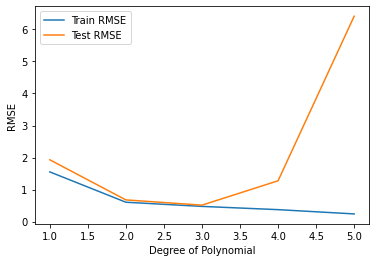

In [65]:
plt.plot(range(1,6), train_rmse_errs_ser[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errs_ser[:5], label='Test RMSE')


plt.legend(loc='upper left')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

Text(0.5, 0, 'Degree of Polynomial')

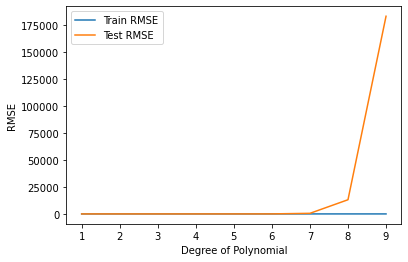

In [68]:
plt.plot(range(1,len(train_rmse_errs_ser)+1), train_rmse_errs_ser, label='Train RMSE')
plt.plot(range(1,len(test_rmse_errs_ser)+1), test_rmse_errs_ser, label='Test RMSE')


plt.legend(loc='upper left')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

In [79]:
final_poly_trafo = PolynomialFeatures(degree=3, include_bias=False)

In [81]:
X_trafo = final_poly_trafo.fit_transform(X)

In [82]:
final_model = LinearRegression()

In [83]:
final_model.fit(X_trafo, y)

LinearRegression()

In [84]:
from joblib import dump, load

In [85]:
dump(final_model, 'final-poly-model.joblib')

['final-poly-model.joblib']

In [86]:
dump(final_poly_trafo, 'final-poly-trafo.joblib')

['final-poly-trafo.joblib']

---

In [88]:
loaded_trafo = load('final-poly-trafo.joblib')

In [89]:
loaded_model = load('final-poly-model.joblib')

In [90]:
campaign = [[149,22,21]]

In [93]:
trafo_campaign = loaded_trafo.fit_transform(campaign)

In [94]:
loaded_model.predict(trafo_campaign)

array([14.60555347])

In [95]:
print('Compare this to the predicted sales from the linear model with no polynomial features of 13.893032')

Compare this to the predicted sales from the linear model with no polynomial features of 13.893032
